# PROJECT : HANDWRITTEN DIGIT RECOGNITION SYSTEM

## Data Preprocessing

### Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Digits_df = pd.read_csv("archive/train.csv")
Digits_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## INSIGHTS ON MNSIT HANDWRITTEN DIGIT DATASET

#### It is a set of 70,000 small images of digits handwritten by high school students and employees of the US causes Bureau.
#### Each image has 28*28 = 784 features.
#### Also Each image has 28*28 pixels.
#### Following is the Sample images from MNIST test dataset taken from Wikipedia.

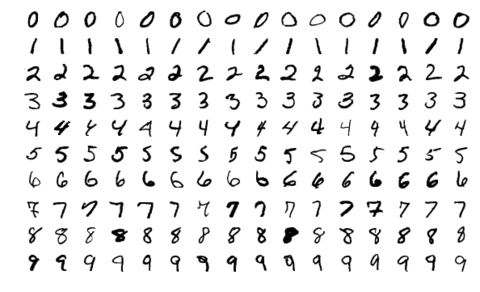

In [2]:
print(Digits_df.shape)
Digits_df.isnull().sum()

(42000, 785)


label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

## There is no null value and categorical Data

### Splitting Feature Matrix(X) and Column Vector(Y) then training and testing dataset

In [3]:
X = Digits_df.iloc[:, 1:].values
Y = Digits_df.iloc[:, 0].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(x_train.shape, x_test.shape)

(33600, 784) (8400, 784)


### Now Data is ready for Modelling

### Check a Digit as image

5


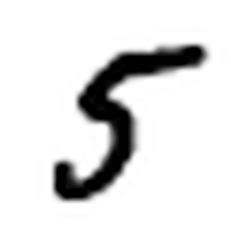

In [4]:
i = 12345
See_Digit = x_train[i].reshape(28, 28)
print(y_train[i])

plt.imshow(See_Digit, cmap="Greys", interpolation="blackman")
plt.axis("off")
plt.show()

## Applying Classification Models

### 1. Logistic Regression Classifier

In [5]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)

C:\Users\subho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
y_predict_LR = LR.predict(x_test)

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
print("Confusion Matrix LR: \n", confusion_matrix(y_test, y_predict_LR))

Confusion Matrix LR: 
 [[791   0   5   0   5  12  19   3   5   2]
 [  0 920   2   5   0   2   1   1   9   1]
 [  2   9 746  17   8   4   9   9  21   5]
 [  4   4  21 761   0  41   2   8  22   5]
 [  1   5   5   1 741   1   9   3   9  29]
 [  5   4   9  33  10 689  15   3  21  11]
 [  3   1   7   0   7  13 779   0   5   0]
 [  4   3   5   8   3   1   1 790   6  38]
 [  7  11  13  22   4  29   5   3 701   6]
 [  5   4   2   8  26   8   0  23   3 761]]


### 2. Gaussian Naive Bayes Classifier

In [9]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(x_train, y_train)

GaussianNB()

In [10]:
y_predict_GNB = GNB.predict(x_test)

In [11]:
print("Confusion Matrix GNB: \n", confusion_matrix(y_test, y_predict_GNB))

Confusion Matrix GNB: 
 [[739   2   5   1   2   3  56   0  20  14]
 [  0 890   0   4   1   3  18   0  17   8]
 [ 75  25 233  79   2   4 233   2 165  12]
 [ 72  47   5 297   3   1  83   5 265  90]
 [ 14  13   5   2 168   4 114   2  99 383]
 [ 97  23   6  11  10  54  79   1 441  78]
 [ 10   6   7   2   0   3 780   0   4   3]
 [  5   7   1  13   8   1   3 285  38 498]
 [ 19 118   2   3   8   7  37   1 475 131]
 [  6   3   3   1   6   0   2  12  15 792]]


### 3. Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100)
RF.fit(x_test, y_test)

RandomForestClassifier()

In [13]:
y_predict_RF = RF.predict(x_test)

In [14]:
print("Confusion Matrix RF: \n", confusion_matrix(y_test, y_predict_RF))

Confusion Matrix RF: 
 [[842   0   0   0   0   0   0   0   0   0]
 [  0 941   0   0   0   0   0   0   0   0]
 [  0   0 830   0   0   0   0   0   0   0]
 [  0   0   0 868   0   0   0   0   0   0]
 [  0   0   0   0 804   0   0   0   0   0]
 [  0   0   0   0   0 800   0   0   0   0]
 [  0   0   0   0   0   0 815   0   0   0]
 [  0   0   0   0   0   0   0 859   0   0]
 [  0   0   0   0   0   0   0   0 801   0]
 [  0   0   0   0   0   0   0   0   0 840]]


### 4. Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
y_predict_DT = DT.predict(x_test)

In [17]:
print("Confusion Matrix DT: \n", confusion_matrix(y_test, y_predict_DT))

Confusion Matrix DT: 
 [[761   1  20  13   5  13  13   5   7   4]
 [  0 895  10   7   5   5   5   2  10   2]
 [  7  13 687  20   8  14  13  24  28  16]
 [  6  11  35 689   6  47   2  18  33  21]
 [  4   8  17   9 673   9   8   9  19  48]
 [ 16   3   5  39  10 641  30   8  26  22]
 [ 12   2  18   2  15  20 729   0  10   7]
 [  2   8  26  12  14   3   2 765   5  22]
 [ 14  13  26  31  17  31  13  11 605  40]
 [  5   6  12  14  39  14   5  31  22 692]]


### 5. KNN Classifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [19]:
y_predict_KNN = KNN.predict(x_test)

In [20]:
print("Confusion Matrix KNN: \n", confusion_matrix(y_test, y_predict_KNN))

Confusion Matrix KNN: 
 [[830   1   2   0   0   2   5   1   0   1]
 [  0 937   2   0   0   0   0   1   0   1]
 [  8  14 783   4   0   1   0  17   3   0]
 [  1   8   1 835   1   6   1   9   4   2]
 [  1  15   0   0 759   0   5   3   0  21]
 [  3   1   0  12   1 764  10   0   0   9]
 [  1   2   0   0   2   8 802   0   0   0]
 [  0  15   2   0   1   0   0 832   0   9]
 [  4  11   4  20   3  11   5   2 728  13]
 [  3   1   1   8   3   0   0  16   1 807]]


## Comparing Models

In [21]:
from sklearn.metrics import accuracy_score, precision_score, mean_absolute_error,mean_squared_error,r2_score, f1_score

### 1. Accuracy Score

In [22]:
print("Accuracy Score Logistic Regression: ", accuracy_score(y_test, y_predict_LR))
print("Accuracy Score GNB: ", accuracy_score(y_test, y_predict_GNB))
print("Accuracy Score Random Forest: ", accuracy_score(y_test, y_predict_RF))
print("Accuracy Score Decision Tree: ", accuracy_score(y_test, y_predict_DT))
print("Accuracy Score KNN: ", accuracy_score(y_test, y_predict_KNN))

Accuracy Score Logistic Regression:  0.9141666666666667
Accuracy Score GNB:  0.5610714285714286
Accuracy Score Random Forest:  1.0
Accuracy Score Decision Tree:  0.8496428571428571
Accuracy Score KNN:  0.9615476190476191


### 2. Precision Score

In [23]:
print("Precision Score Logistic Regression: ", precision_score(y_test, y_predict_LR,average='micro'))
print("Precision Score GNB: ", precision_score(y_test, y_predict_GNB,average='micro'))
print("Precision Score Random Forest: ", precision_score(y_test, y_predict_RF,average='micro'))
print("Precision Score Decision Tree: ", precision_score(y_test, y_predict_DT,average='micro'))
print("Precision Score KNN: ", precision_score(y_test, y_predict_KNN,average='micro'))

Precision Score Logistic Regression:  0.9141666666666667
Precision Score GNB:  0.5610714285714286
Precision Score Random Forest:  1.0
Precision Score Decision Tree:  0.8496428571428571
Precision Score KNN:  0.9615476190476191


### 3. f1 Score

In [24]:
print("f1 Score Logistic Regression: ", f1_score(y_test, y_predict_LR, average='micro'))
print("f1 Score GNB: ", f1_score(y_test, y_predict_GNB, average='micro'))
print("f1 Score Random Forest: ", f1_score(y_test, y_predict_RF, average='micro'))
print("f1 Score Decision Tree: ", f1_score(y_test, y_predict_DT, average='micro'))
print("f1 Score KNN: ", f1_score(y_test, y_predict_KNN, average='micro'))

f1 Score Logistic Regression:  0.9141666666666667
f1 Score GNB:  0.5610714285714286
f1 Score Random Forest:  1.0
f1 Score Decision Tree:  0.8496428571428571
f1 Score KNN:  0.9615476190476191


### 4. R2 Score

In [25]:
print("r2 Score Logistic Regression: ", r2_score(y_test, y_predict_LR))
print("r2 Score GNB: ", r2_score(y_test, y_predict_GNB))
print("r2 Score Random Forest: ", r2_score(y_test, y_predict_RF))
print("r2 Score Decision Tree: ", r2_score(y_test, y_predict_DT))
print("r2 Score KNN: ", r2_score(y_test, y_predict_KNN))

r2 Score Logistic Regression:  0.827864274387426
r2 Score GNB:  0.12764027497162356
r2 Score Random Forest:  1.0
r2 Score Decision Tree:  0.7026811387753984
r2 Score KNN:  0.9199295746466989


### 5. Mean Absolute Error

In [26]:
print("Mean Absolute Error Logistic Regression: ", mean_absolute_error(y_test, y_predict_LR))
print("Mean Absolute Error GNB: ", mean_absolute_error(y_test, y_predict_GNB))
print("Mean Absolute Error Random Forest: ", mean_absolute_error(y_test, y_predict_RF))
print("Mean Absolute Error Decision Tree: ", mean_absolute_error(y_test, y_predict_DT))
print("Mean Absolute Error KNN: ", mean_absolute_error(y_test, y_predict_KNN))

Mean Absolute Error Logistic Regression:  0.30654761904761907
Mean Absolute Error GNB:  1.6047619047619048
Mean Absolute Error Random Forest:  0.0
Mean Absolute Error Decision Tree:  0.5314285714285715
Mean Absolute Error KNN:  0.13976190476190475


### 6. Mean Squared Error

In [27]:
print("Mean Squared Error Logistic Regression: ", mean_squared_error(y_test, y_predict_LR, squared=False))
print("Mean Squared Error GNB: ", mean_squared_error(y_test, y_predict_GNB, squared=False))
print("Mean Squared Error Random Forest: ", mean_squared_error(y_test, y_predict_RF, squared=False))
print("Mean Squared Error Decision Tree: ", mean_squared_error(y_test, y_predict_DT, squared=False))
print("Mean Squared Error KNN: ", mean_squared_error(y_test, y_predict_KNN, squared=False))

Mean Squared Error Logistic Regression:  1.1986599660811712
Mean Squared Error GNB:  2.69841223155925
Mean Squared Error Random Forest:  0.0
Mean Squared Error Decision Tree:  1.575330653122279
Mean Squared Error KNN:  0.8175165645620481


### Testing a random Test Data

LR:  [6]
GNB:  [6]
RF:  [6]
DT:  [6]
KNN:  [6]


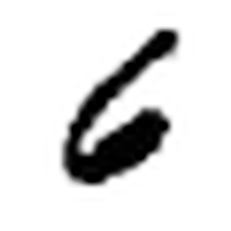

In [30]:
j = 100
See_Digit = x_test[j].reshape(28, 28)
print("LR: ", LR.predict(x_test[j].reshape(1, 784)))
print("GNB: ", GNB.predict(x_test[j].reshape(1, 784)))
print("RF: ", RF.predict(x_test[j].reshape(1, 784)))
print("DT: ", DT.predict(x_test[j].reshape(1, 784)))
print("KNN: ", KNN.predict(x_test[j].reshape(1, 784)))

plt.imshow(See_Digit, cmap="Greys", interpolation="blackman")
plt.axis("off")
plt.show()